In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("Social_Network_Ads.csv")
df.sample(5)

,Age,EstimatedSalary,Purchased
47,27,54000,0
19,48,29000,1
73,33,113000,0
45,23,20000,0
204,58,101000,1


In [3]:
df.shape

(400, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Train test split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size =0.3,random_state=0)

In [6]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

### StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

StandardScaler()

In [9]:
# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [12]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=x_test.columns)

In [14]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of Scaling

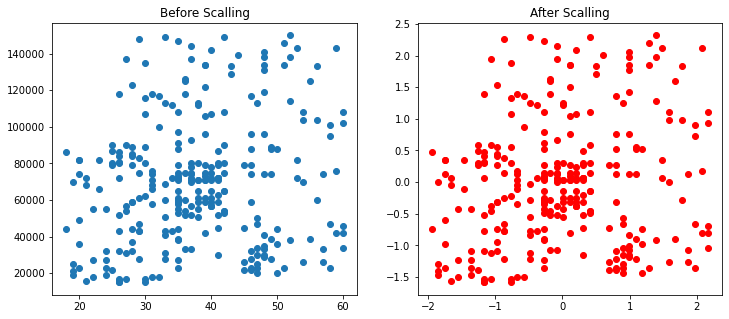

In [16]:
fig,(ax1,ax2)= plt.subplots(ncols =2 ,figsize =(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scalling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color ='red')
ax2.set_title("After Scalling")
plt.show()

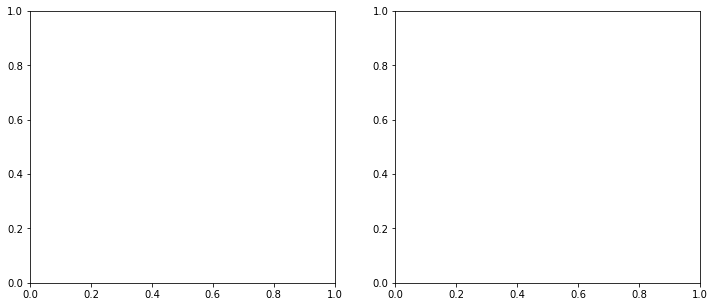

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize =(12,5))


<AxesSubplot:title={'center':'Before Scaling'}, xlabel='Age', ylabel='Density'>

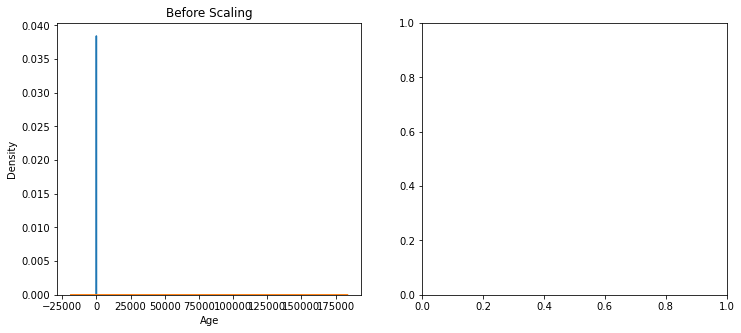

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize =(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)



<AxesSubplot:xlabel='Age', ylabel='Density'>

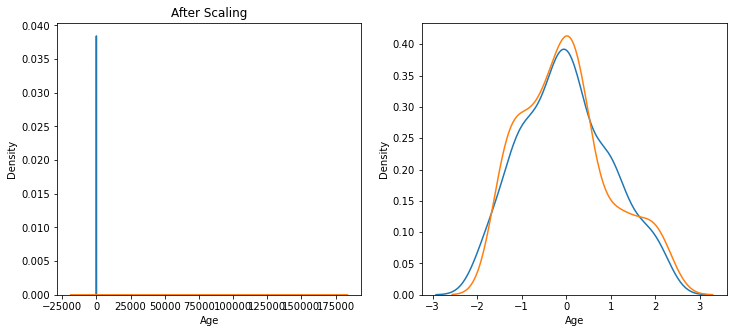

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize =(12,5))

#Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After scaling
ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

### Comparison of Distributions

<AxesSubplot:xlabel='Age', ylabel='Density'>

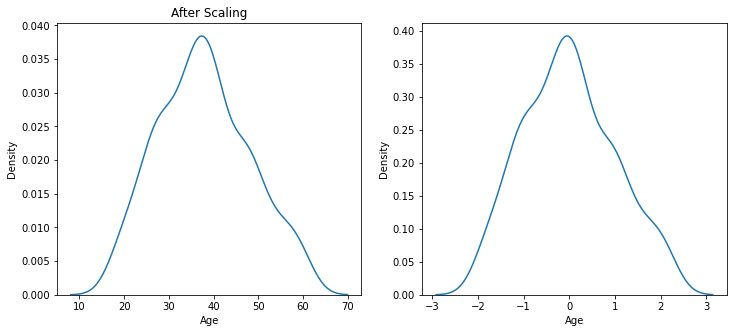

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize =(12,5))

#Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)

#After scaling
ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

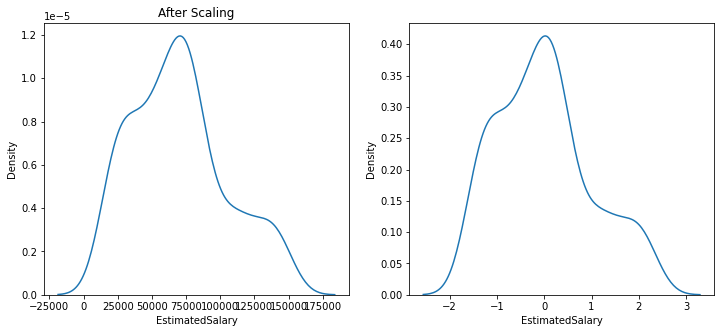

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize =(12,5))

#Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After scaling
ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

### Why scaling is important?

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr =LogisticRegression()
lr_scaled =LogisticRegression()

In [24]:
lr.fit(x_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [30]:
dt.fit(x_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [32]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.875


In [33]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of Outlier

In [34]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [35]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


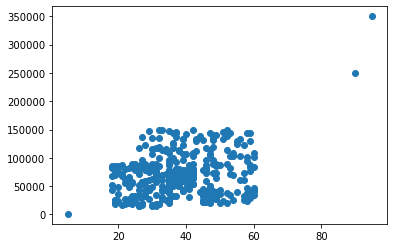

In [36]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size =0.3,random_state=0)

In [38]:
x_train.shape,x_test.shape

((282, 2), (121, 2))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=x_test.columns)

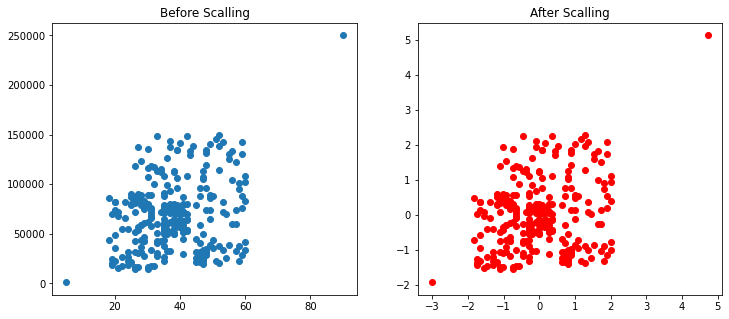

In [41]:
fig,(ax1,ax2)= plt.subplots(ncols =2 ,figsize =(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scalling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color ='red')
ax2.set_title("After Scalling")
plt.show()